In [26]:
from matplotlib.ticker import FuncFormatter
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from variables import *

In [7]:
def fetch_monthly_summary():
    try:
        engine = create_engine(f"oracle+oracledb://{DB_USER}:{DB_PASSWORD}@{DB_DSN}")
        print("Connected with database.")

        query = """
            SELECT month, total_sales, total_transactions
            FROM monthly_summary
            ORDER BY month
        """

        df = pd.read_sql_query(query, con=engine)
        
        print("Data fetched successfully.")
        return df

    except Exception as e:
        print(f"Error {e}")
        return None

In [41]:
def generate_report(df):
    df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    ax1.bar(df['month'], df['total_sales'], color='skyblue', label='Total Sales', width=20)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Sales')
    ax1.tick_params(axis='y')
    
    ax1.set_xticks(df['month'])
    ax1.set_xticklabels(df['month'].dt.strftime('%Y-%m'), rotation=45, ha='right')
    
    formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
    ax1.yaxis.set_major_formatter(formatter)
    
    ax2 = ax1.twinx()
    ax2.plot(df['month'], df['total_transactions'], color='red', marker='o', linestyle='-', linewidth=2)
    
    plt.title("Total Sales and Total Transactions by Month")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

Connected with database.
Data fetched successfully.
     month  total_sales  total_transactions
0  2022-12     49383838                   9
1  2023-01     33230554                   9
2  2023-02     18431009                   5
3  2023-03     13863388                   4
4  2023-04     37777298                  10


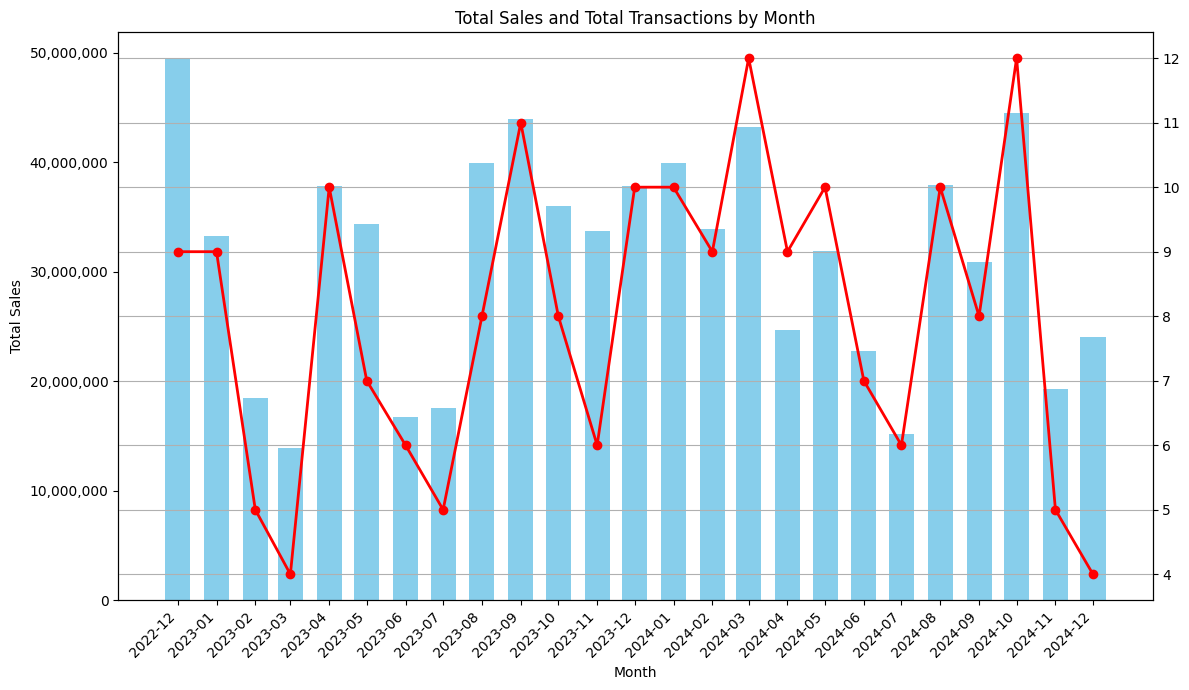

In [42]:
df = fetch_monthly_summary()
if df is not None and not df.empty:
    print(df.head())
    generate_report(df)
else:
    print("No data to display.")